In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
%matplotlib inline 

In [2]:
experiment = Table().with_columns(
    "Patients", make_array("Control", "Control", "Control", "Treated", "Treated", "Treated", "Treated"),
    "Recovery Time (days)", make_array(22, 33, 40,19, 22, 25, 26)
)
experiment

Patients,Recovery Time (days)
Control,22
Control,33
Control,40
Treated,19
Treated,22
Treated,25
Treated,26


In [3]:
experiment.group("Patients", np.mean)

Patients,Recovery Time (days) mean
Control,31.6667
Treated,23


In [4]:
experiment.group("Patients", np.std)

Patients,Recovery Time (days) std
Control,7.4087
Treated,2.73861


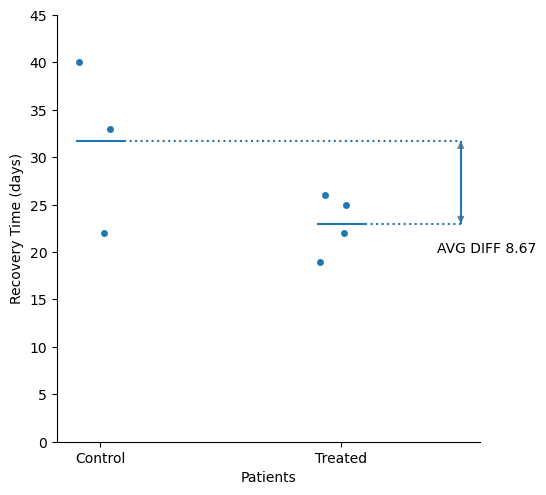

In [7]:
control_mean = 31.7
treated_mean = 23

sns.catplot(data=experiment.to_df(), x="Patients", y="Recovery Time (days)")
ax = plt.gca()
ax.set_ylim((0, 45))
ticks = ax.get_xticks()
w = 0.1
xmin, xmax = ax.get_xlim()
ax.hlines(control_mean, ticks[0]-w, ticks[0]+w)
ax.hlines(treated_mean, ticks[1]-w, ticks[1]+w)
ax.hlines(control_mean, ticks[0]+w, xmax, linestyles='dotted')
ax.hlines(treated_mean, ticks[1]+w, xmax, linestyles='dotted')
ax.vlines(xmax, treated_mean, control_mean,)
my_arrow = FancyArrowPatch(posA=(xmax, treated_mean),
                          posB=(xmax, control_mean), 
                          arrowstyle='<|-|>', color="0.5",
                          mutation_scale=10, shrinkA=0, shrinkB=0)
ax.add_artist(my_arrow)
ax.text(xmax-w, 20, "AVG DIFF 8.67")
plt.show();

In [8]:
experiment

Patients,Recovery Time (days)
Control,22
Control,33
Control,40
Treated,19
Treated,22
Treated,25
Treated,26


In [17]:
num_simulations = 50000
differences_in_means = []
for i in np.arange(num_simulations):
    sample = (experiment.select("Recovery Time (days)")
              .sample(7, with_replacement=False)
              .column("Recovery Time (days)")
             )
    control_mean = np.mean(sample[0:3])
    treatment_mean = np.mean(sample[3:7])
    differences_in_means.append(control_mean - treatment_mean)

In [10]:
np.count_nonzero(abs(np.array(differences_in_means)) >= 8.67) / num_simulations

0.0861

In [22]:
num_simulations = 100000
diff_means = 8.67
simulated_diffs = []
recovery = experiment.column("Recovery Time (days)")
for _ in np.arange(num_simulations):
    np.random.shuffle(recovery)
    new_diff = np.mean(recovery[:3]) - np.mean(recovery[3:])
    simulated_diffs.append(new_diff)
p_val_simulation = np.sum(np.abs(simulated_diffs) >= diff_means) / num_simulations
print(f"P-value from simulation: {p_val_simulation}")

P-value from simulation: 0.08536


In [14]:
np.random.shuffle(recovery)

In [15]:
recovery

array([22, 22, 19, 33, 25, 26, 40])